# Raincloudplot Tutorial

Following this tutorial: https://wellcomeopenresearch.org/articles/4-63

[Text(0.5, 1.0, 'Mean of Bp Measure for Metatarsal bone')]

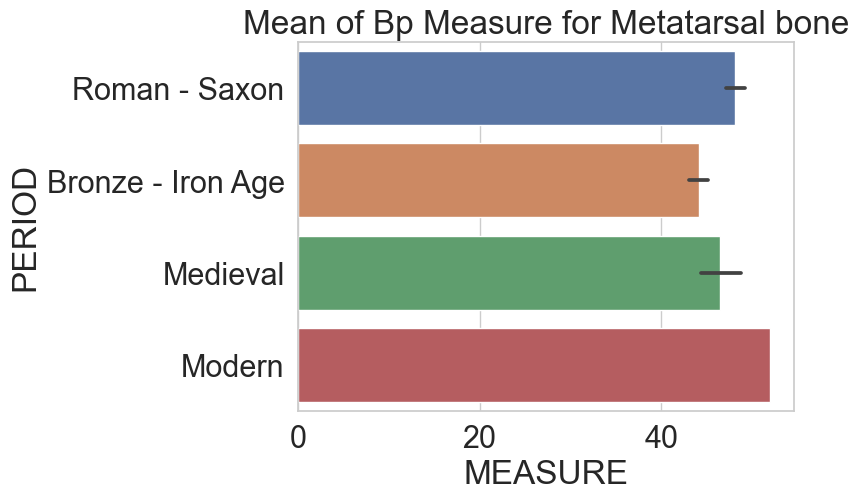

In [3]:
import ptitprince as pt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt

df = pd.read_csv("data/csv/test/metatarsal_Bp.csv", sep=",")

sns.barplot(x='MEASURE', y='PERIOD', data=df).set(title='Mean of Bp-Measure for Metatarsal bone')

Dieser Barplot zeigt in einem ersten Überblick das arithmetische Mittel (mean) der Zeitperioden und die Standardabweichung.

Um die Verteilung der Daten besser sehen zu können, bilden wir sie in einer "Wolke" ab und fügen eine einfache, eindimensionale Repräsentation der Datenpunkt als "Regen" hinzu:

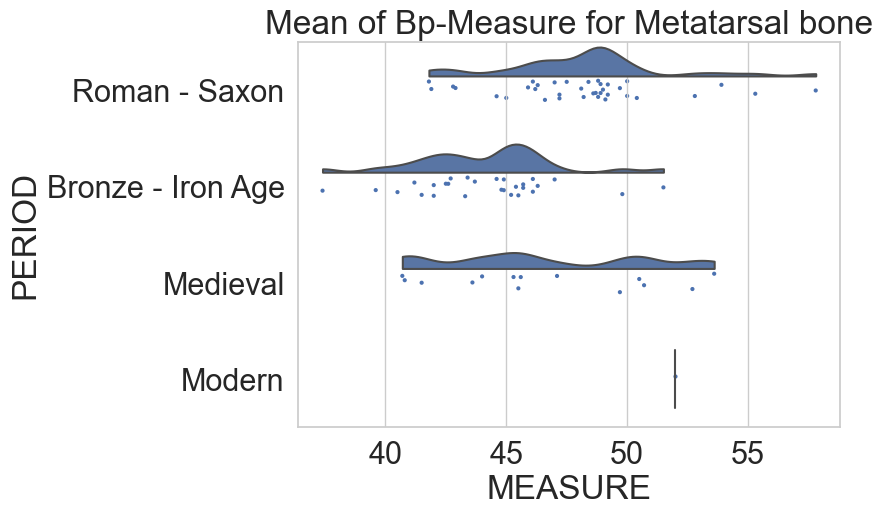

In [4]:
f, ax = plt.subplots(figsize=(7, 5))
dy = 'PERIOD'
dx = 'MEASURE'
ort = 'h'
pal = sns.color_palette(n_colors=1)

ax = pt.half_violinplot(x=dx, y=dy, data=df, palette=pal,
                        bw=.2, cut=0, scale='area', width=.6,
                        inner=None, orient=ort).set(title='Bp-Measure for Metatarsal bone')

ax = sns.stripplot(x=dx, y=dy, data=df, palette=pal,
                   edgecolor="white", size=3, jitter=1,
                   zorder=0, orient=ort)

Auf diese Weise kann man die Verteilung der Datenpunkte schon ganz gut sehen, aber der Median und die Quartile sind noch nicht wirklich gut erkennbar. Deshalb wird ein "leerer" Boxplot hinzugefügt:

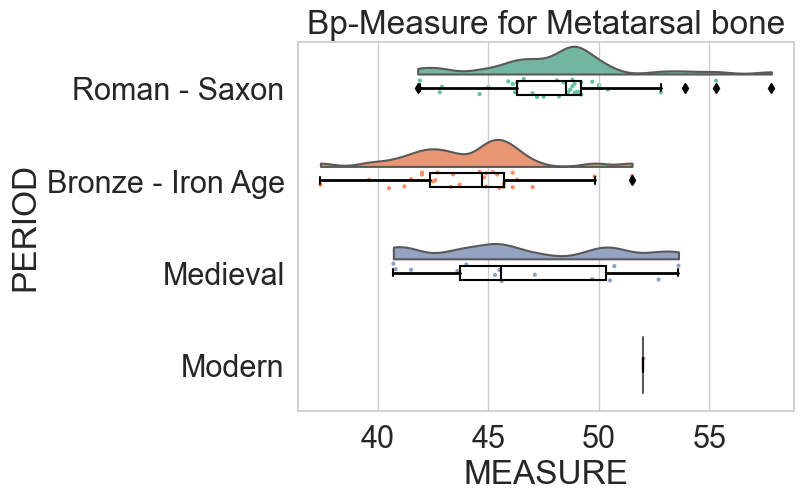

In [5]:
pal = "Set2"
ax = pt.half_violinplot(x=dx, y=dy, data=df, palette=pal,
                        bw=.2, cut=0, scale='area', width=.6,
                        inner=None, orient=ort).set(title='Bp-Measure for Metatarsal bone')

ax = sns.stripplot(x=dx, y=dy, data=df, palette=pal,
                   edgecolor="white", size=3, jitter=1,
                   zorder=0, orient=ort)

ax = sns.boxplot(x=dx, y=dy, data=df, color="black",
                 width=.15, zorder=10, showcaps=True,
                 boxprops={'facecolor':'None', 'zorder':10}, showfliers=True,
                 whiskerprops={'linewidth':2, "zorder":10},
                 saturation=1, orient=ort)


Und jetzt das ganze noch mal mit der "Raincloud"-Plot Funktion:

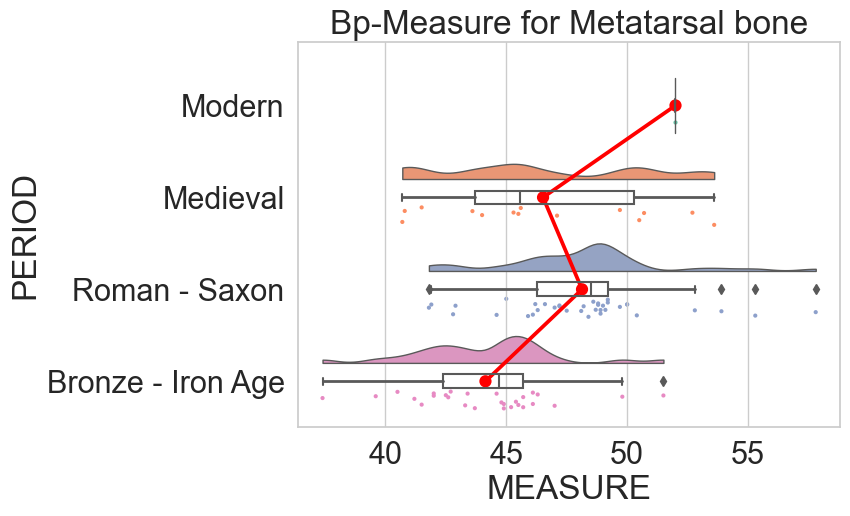

In [7]:
''' x MÜSSEN die kategorischen Daten sein '''
dx = "PERIOD"
dy = "MEASURE"

''' Orientation horizontal (h) oder vertikal (v)'''
ort = "h"

''' move moves the datapoints below the box for better visibility'''
mv = .2

pal = "Set2"

''' sigma adjusts the smoothing kernel used to generate the probability distribution function of the data '''
sigma = .2

f,ax = plt.subplots(figsize=(7,5))

''' adding a red line connecting the mean values of the groups by using pointplot=True'''
ax = pt.RainCloud(x=dx, y=dy, data=df, palette=pal,
                  bw=sigma, width_viol=.6, ax=ax, orient=ort,
                  order=["Modern", "Medieval", "Roman - Saxon", "Bronze - Iron Age"],
                  move=mv, pointplot=True).set(title='Bp-Measure for Metatarsal bone')

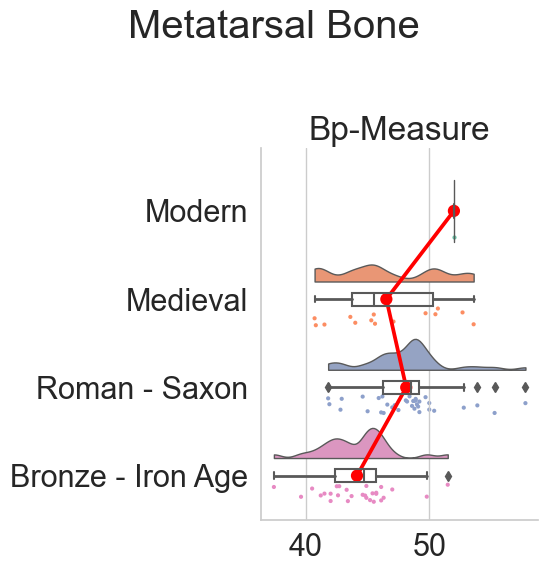

In [16]:
# x MÜSSEN die kategorischen Daten sein
dx = "PERIOD"
dy = "MEASURE"

# 'orient' horizontal (h) or vertical (v)
ort = "h"

# 'move' moves the datapoints below the box for better visibility
mv = .2

# 'palette' is the color-palette
pal = "Set2"

# 'sigma' adjusts the smoothing kernel used to generate the probability distribution function of the data
sigma = .2

g = sns.FacetGrid(df, col="MEASTYPE", height=6).set_axis_labels(x_var="Size in mm")
g = g.map_dataframe(pt.RainCloud, x=dx, y=dy, data=df,
                    order=["Modern", "Medieval", "Roman - Saxon", "Bronze - Iron Age"],
                    palette=pal,
                    orient=ort, move=mv, pointplot=True)
g.set_titles(col_template='{col_name}-Measure', row_template='{row_name}')
g.fig.suptitle('Metatarsal Bone')
g.fig.subplots_adjust(top=0.75)

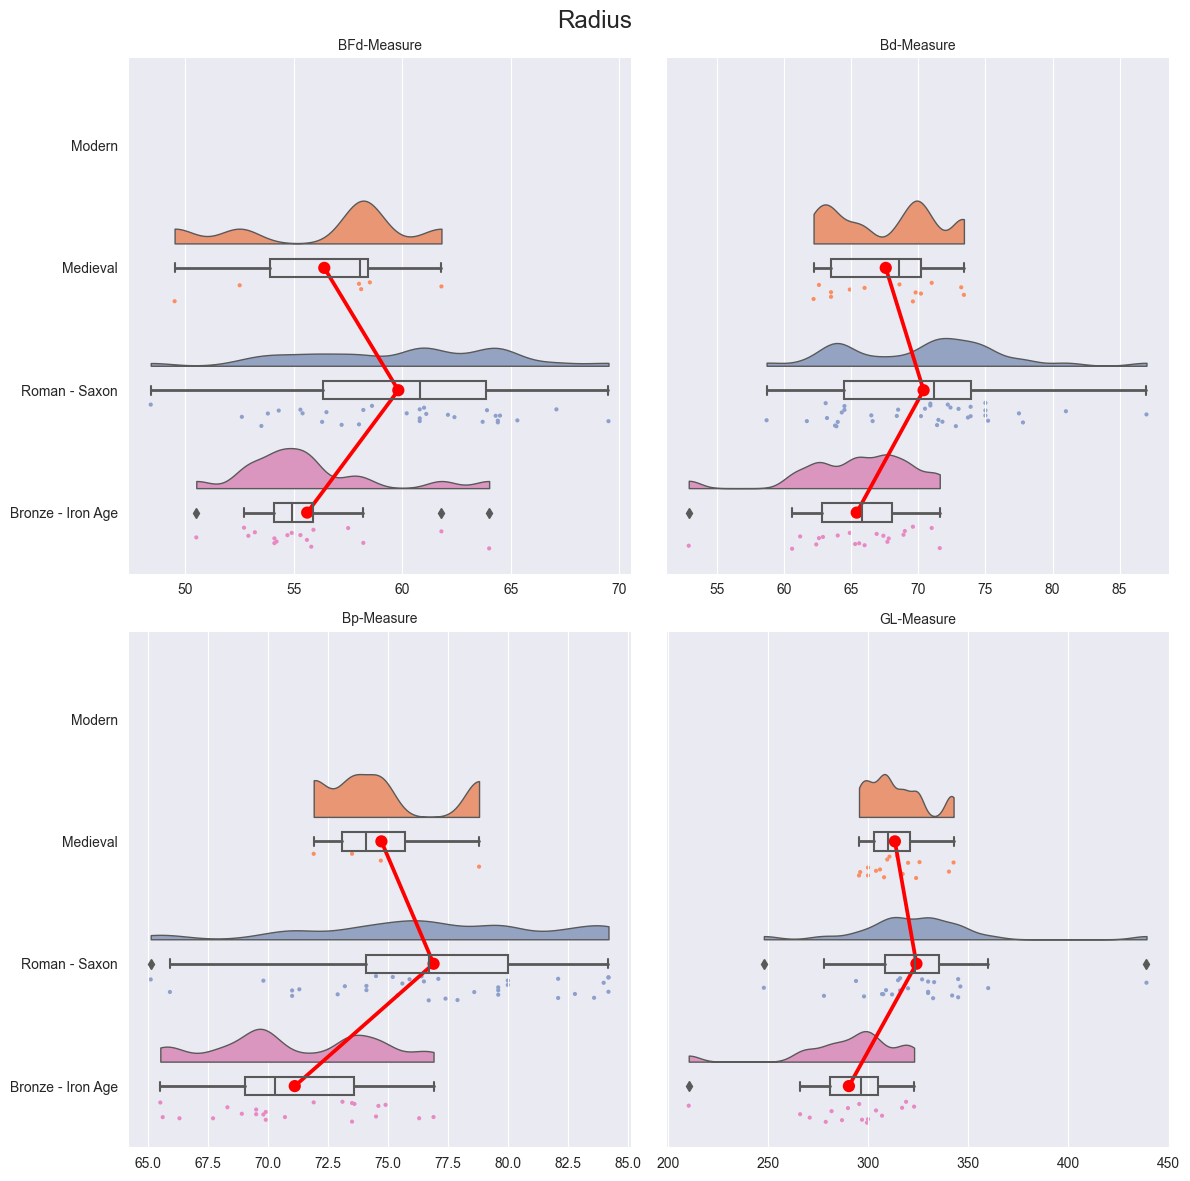

In [1]:
from utils import plotting
import pandas as pd

df_radius = pd.read_csv("data/csv/elements/meastypes/radius_meastypes.csv", sep=",")

plotting.raincloud_plot(df_radius, "Radius")
